In [61]:
from common import *
%matplotlib

CALIB_DIR = ("data", "calib")
VOLUME = 2 # liters

Using matplotlib backend: TkAgg


In [62]:
def linefit(data):
    datamean = np.average(data, axis=0)
    _, _, vv = np.linalg.svd(data - datamean)

    a = vv[0]
    a /= np.linalg.norm(a)
    
    r0 = datamean

    return a, r0

def get_param(r, r0, a):
    return np.dot(a.T, r-r0)

def color_from_param(t, r0, a):
    return r0 + a*t

In [63]:
def extract_weight(name: str):
    rsep = name.find(".")
    lsep = name.rfind("\\")
    w = float(name[lsep+1:rsep].replace("_", "."))
    return w

names, weights = get_names(CALIB_DIR, extract_weight)

clrs = []
bncs = [] # gramm / liter

for name, weight in zip(names, weights):
    img = cv2.imread(name)

    img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img = rotate_image(img, ROTATION)
    img = crop_image(img, CROP_X, CROP_Y)

    avg = np.rint(np.average(img, axis=(0,1)))
    clrs.append(avg)
    bncs.append(weight / VOLUME)

clrs = np.array(clrs)

In [69]:
a, r0 = linefit(clrs)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for bgr, bnc in zip(clrs, bncs):
    rgb = np.array(bgr[::-1], dtype=np.float32) / 255

    ax.scatter(*bgr, c=rgb, label=f"$\\rho = {bnc} г/л$", s=40)

pts = np.array([r0 + a*128, r0 - a*128])

print(pts)

ax.plot(pts[:, 0], pts[:, 1], pts[:, 2])

ax.set_xlabel("B")
ax.set_ylabel("G")
ax.set_zlabel("R")

fig.legend()
fig.show()


[[-14.95960516  -6.46204448  26.59801474]
 [146.2929385  151.46204448 147.40198526]]


C:\Users\Vladimir\AppData\Local\Temp\ipykernel_19164\2549767274.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(*bgr, c=rgb, label=f"$\\rho = {bnc} г/л$", s=40)


[0.00426302 0.5425    ]
[-0.62989275 -0.61689097 -0.47189051]
[65.66666667 72.5        87.        ]


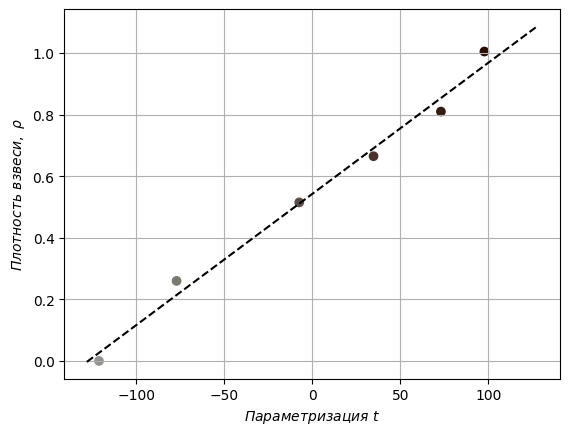

In [81]:
%matplotlib inline
T = np.array([get_param(bgr, r0, a) for bgr in clrs])
colors = [color_from_param(t, r0, a)[::-1] / 255 for t in T]

plt.scatter(T, bncs, marker="o", c=colors)
plt.xlabel("$Параметризация ~t$")
plt.ylabel("$Плотность~ взвеси,~ \\rho$")
plt.grid()

p = np.polyfit(T, bncs, 1)

interval = [-128, 128]

plt.plot(interval, np.polyval(p, interval), "k--")

print(p)
print(a)
print(r0)

In [82]:
COLORFIT_K = 0.00426302
COLORFIT_B = 0.5425
COLORFIT_A = np.array([-0.62989275, -0.61689097, -0.47189051])
COLORFIT_R0 = np.array([65.66666667, 72.5, 87.])